In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Data Wrangling

In [2]:
#Import data
df = pd.read_csv('../yellow_tripdata_2019-01.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [3]:
#Analyze dataframe type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [4]:
#Basic statistics
df.describe()

#Max distance related to max total_amount? 
#Calculate density based on time/distance and detect heavier zones. Related to congestion_surcharge?

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


## Cast date series to Datetime and check if the month is January for all the records

In [5]:
#Datetime objects to datetime types
df['date_pickup'] = df['tpep_pickup_datetime'].astype('datetime64')
df['date_dropoff'] = df['tpep_dropoff_datetime'].astype('datetime64')

In [6]:
#Validate types
df.dtypes

VendorID                          int64
tpep_pickup_datetime             object
tpep_dropoff_datetime            object
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
date_pickup              datetime64[ns]
date_dropoff             datetime64[ns]
dtype: object

In [7]:
#Create month series to check if there are different values to January
df['month'] = df['date_pickup'].dt.month
df['month'].value_counts()

#Those different months could be a typo

1     7667309
12        377
2          73
11         11
7           6
4           6
3           5
6           2
9           1
8           1
5           1
Name: month, dtype: int64

In [8]:
#Reduce dataframe to January records
df = df[(df['month'] == 1)]

In [9]:
#Create day and hour series
df['day'] = df['date_pickup'].dt.day
df['hour'] = df['date_pickup'].dt.hour

In [10]:
#Calculate trip duration in minutes
df['trip_duration'] = (df['date_dropoff']-df['date_pickup']).astype('timedelta64[m]')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date_pickup,date_dropoff,month,day,hour,trip_duration
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.0,0.3,9.95,NaN,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1,0,6.0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.0,0.3,16.30,NaN,2019-01-01 00:59:47,2019-01-01 01:18:59,1,1,0,19.0
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,...,0.0,0.3,9.05,NaN,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1,0,7.0
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,...,0.0,0.3,18.50,NaN,2019-01-01 00:32:01,2019-01-01 00:45:39,1,1,0,13.0
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,...,0.0,0.3,13.00,NaN,2019-01-01 00:57:32,2019-01-01 01:09:32,1,1,0,12.0


## Explore distance serie and binning it

In [11]:
#Distance five-number summary
print('The max distance is', str(df['trip_distance'].max()), 'miles.')
print('The min distance is', str(df[(df['trip_distance'] != 0)]['trip_distance'].min()), 'miles.')
print('The lower quartile is', str(df['trip_distance'].quantile(.25)))
print('The higher quartile is', str(df['trip_distance'].quantile(.75)))
print('The mean is', str(round(df['trip_distance'].mean(),2)))

The max distance is 831.8 miles.
The min distance is 0.01 miles.
The lower quartile is 0.9
The higher quartile is 2.8
The mean is 2.8


<ipython-input-12-f7d29cc5dda3>:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  mode = df['trip_distance'].mode().get_values()[0]


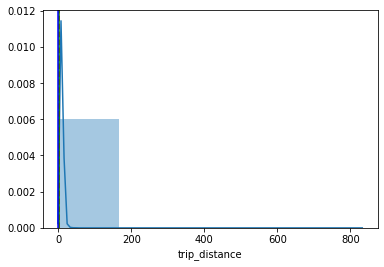

In [12]:
#Explore distance serie. Binning data by km

mean = df['trip_distance'].mean()
median = df['trip_distance'].median()
mode = df['trip_distance'].mode().get_values()[0]

sns.distplot(df['trip_distance'], bins=5)
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')

plt.show()
plt.close()

In [13]:
#Is there any distance value = 0?
distance0 = df[(df['trip_distance'] == 0.0)]['trip_distance']
print('There are', str(len(distance0)),'records with distance 0')

There are 54749 records with distance 0


In [14]:
#Analyze when distance = 0, which total_amount there are
df[(df['trip_distance'] == 0.0)]['total_amount'].value_counts()

3.30      10279
3.80       5901
4.30       3779
52.80      1491
0.00       1270
          ...  
89.90         1
72.10         1
83.38         1
35.32         1
131.45        1
Name: total_amount, Length: 3541, dtype: int64

In [15]:
#Analyze when distance and total_mount are both 0
dt0 = len(df[(df['trip_distance'] == 0.0) & (df['total_amount'] == 0.00)])
print('There are', dt0, 'trips with 0 miles and a value of $0.')

There are 1270 trips with 0 miles and a value of $0.


In [16]:
#Binning distance
df['distance'] = pd.cut(df['trip_distance'], 10)
df['distance'].value_counts()

(-0.832, 83.18]     7667261
(83.18, 166.36]          43
(166.36, 249.54]          3
(748.62, 831.8]           1
(665.44, 748.62]          1
(582.26, 665.44]          0
(499.08, 582.26]          0
(415.9, 499.08]           0
(332.72, 415.9]           0
(249.54, 332.72]          0
Name: distance, dtype: int64

In [17]:
#Percentage of trips < 84 miles, classified as short distance
pdist = round((len(df[(df['trip_distance'] < 84)]) / len(df)) * 100, 4)
print('There is ', pdist,'% of trips under 84 miles, short distance')

There is  99.9994 % of trips under 84 miles, short distance


## Explore total_amount serie

In [18]:
#Total_amount five-number summary
print('The max amount is $', str(df['total_amount'].max()))
print('The min amount is $', str(df[(df['total_amount'] != 0)]['trip_distance'].min()))
print('The lower quartile is', str(df['total_amount'].quantile(.25)))
print('The higher quartile is', str(df['total_amount'].quantile(.75)))
print('The mean is $', str(round(df['total_amount'].mean(),2)))

The max amount is $ 623261.66
The min amount is $ 0.0
The lower quartile is 8.19
The higher quartile is 16.56
The mean is $ 15.68


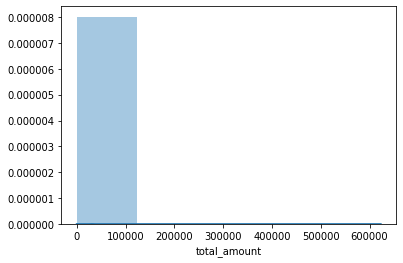

In [19]:
#Analyze total_amount
plt.figure()
sns.distplot(df['total_amount'], bins=5)
plt.show()
plt.close()

In [20]:
#Analyze total_amount < $20
damount = round((len(df[(df['total_amount'] > 0.0) & (df['total_amount'] < 20)]) / len(df))*100, 2)
print('There is a', damount,'% of trips under $20')

There is a 82.18 % of trips under $20


## Explore zones

In [21]:
#Explore zones where taxis pickup. Top 20.
df['PULocationID'].value_counts().nlargest(20)

237    332458
236    322997
161    312380
162    277152
230    263632
186    260701
48     240872
170    238968
234    237639
142    235135
239    207873
163    199671
132    196593
79     193930
141    192370
138    184328
107    176770
164    172627
68     171958
238    162186
Name: PULocationID, dtype: int64

In [22]:
#Explore zones where taxis dropoff. Top 20.
df['DOLocationID'].value_counts().nlargest(20)

236    334311
237    296176
161    293776
170    242026
162    232444
230    225330
142    214157
48     208606
234    204374
239    204344
141    202170
186    189478
163    175749
238    175301
79     168593
68     167135
107    162683
263    158292
164    154192
140    152032
Name: DOLocationID, dtype: int64

<ipython-input-23-98637bc08f93>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


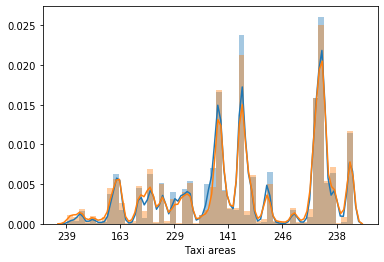

In [23]:
#Explore zones where taxis pickup and dropoff
plt.figure()
sns.distplot(df['PULocationID'])
sns.distplot(df['DOLocationID'])
ax = plt.subplot()
ax.set_xticklabels(df['PULocationID'])
ax.set_xlabel('Taxi areas')
plt.show()

plt.close()

## Yellow Zone

In [24]:
#Explore zones
zones = pd.read_csv('../taxi+_zone_lookup.csv')
zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [25]:
#Reducing dataframe only to yellow zone. 
yellow = zones[(zones['service_zone'] == 'Yellow Zone')]
yellow_list = yellow['LocationID'].tolist()
len(yellow_list)
print('Yellow zones are', yellow_list, 'There are a total of', len(yellow_list), 'zones in.')

Yellow zones are [4, 12, 13, 24, 43, 45, 48, 50, 68, 79, 87, 88, 90, 100, 103, 104, 105, 107, 113, 114, 125, 137, 140, 141, 142, 143, 144, 148, 151, 158, 161, 162, 163, 164, 170, 186, 194, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 246, 249, 261, 262, 263] There are a total of 55 zones in.


In [26]:
df = df[(df['PULocationID'].isin(yellow_list))]
df.shape

(6742437, 25)

In [27]:
#Grouping dataframe by pickup zone and counting which ones where more demanding

table = pd.pivot_table(df, values='day', index=['hour'],
                    columns=['PULocationID'], aggfunc=np.count_nonzero, fill_value=0)
table

PULocationID,4,12,13,24,43,45,48,50,68,79,...,234,236,237,238,239,246,249,261,262,263
hour,,,,,,,,,,,,,,,,,,,,,
0,957,23,796,438,1230,654,9671,1822,5583,13422,...,7157,2179,3581,2062,3220,2378,8494,788,697,3512
1,988,20,400,323,639,568,6873,1190,4550,12546,...,4479,1103,1952,1257,1990,2351,6437,422,468,2590
2,751,10,216,223,232,363,5126,948,4157,10254,...,3018,596,976,785,1173,2296,4837,303,257,1909
3,461,1,95,164,147,197,4243,812,3812,7121,...,1700,380,620,494,697,2422,3360,205,182,1349
4,299,3,133,163,222,112,4336,626,2660,4077,...,1194,587,639,640,645,1444,1954,149,376,1137
5,172,7,363,296,540,75,4889,637,2107,2158,...,1158,1814,1479,1509,1505,491,1243,262,1284,1939
6,241,18,1366,541,1428,92,10315,1508,4154,3166,...,2924,6735,5031,3790,3399,1284,2535,413,4004,4701
7,514,39,3351,1558,4070,198,11827,3088,5534,4742,...,5877,15929,13825,7498,7189,2944,4218,761,6910,7458
8,846,54,4891,1785,5471,346,11302,3924,6800,5992,...,8158,21287,17375,10915,10360,4602,5566,1143,7413,9041
